## Exploratory Data Analysis

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 
from ipywidgets import widgets
import pickle

Initial Data Loading and Cleaning

In [2]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [3]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label, as well as an additional 27455 28x28 augmented images, using the keras.preprocessing.image.ImageDataGenerator function. This is meant to increase the diversity of the data to prevent overfitting found in the original dataset. The testing dataset consists of 7172 28x28 images and 7172 28x28 augmented images. The label and pixels are split into X and y for both training and testing data. 

The below is a function to find the indices of a specified label. 

In [4]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
        

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [5]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset. 

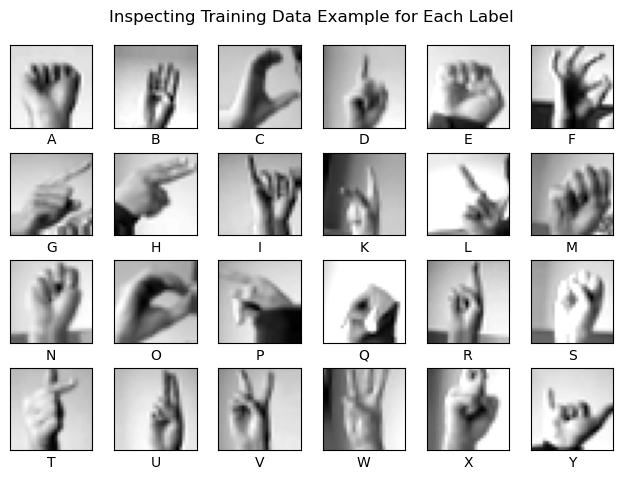

In [6]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

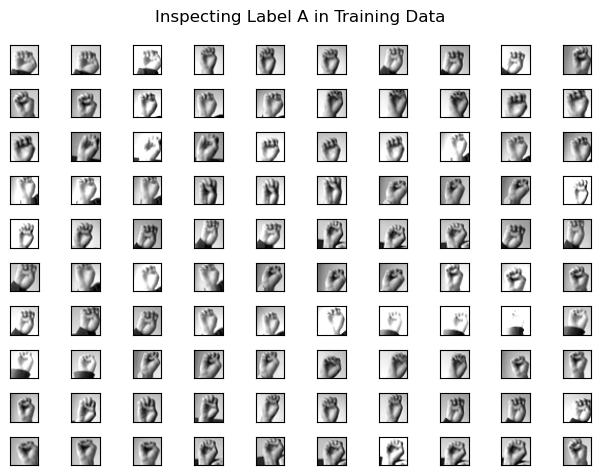

In [7]:
#visualization of dataset 
fig, ax = plt.subplots(10,10)
plt.suptitle('Inspecting Label A in Training Data')
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)[0]

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

### Exploratory Data Analysis

Checking for any class imbalances in the training data. Looking at the plot below, there are not potentially underrepresented data points. 

Text(0, 0.5, 'Data Point Count')

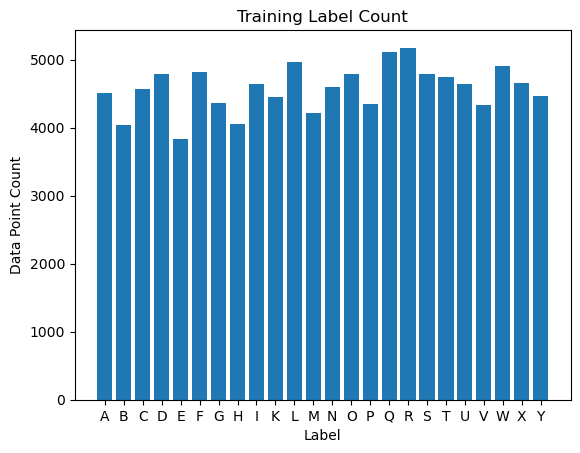

In [8]:
#counting the number of labels in the training data 
label, count = np.unique(y_train, return_counts=True)

#plotting 
plt.bar(letters, count)
plt.title('Training Label Count')
plt.xlabel('Label')
plt.ylabel('Data Point Count')

The general descriptive statistics of the training dataset is calculated.

In [9]:
#converting numpy array to dataframe
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0],-1))
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0],-1))

In [10]:
#calculate descriptive statistics 
descr_stats = X_train_df.describe()
descr_stats

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,...,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000
mean,147.395116,149.268720,151.316305,153.435079,155.695661,157.783368,159.726546,161.500370,163.040255,164.372013,...,139.510896,144.174855,148.854093,153.342464,156.495050,158.321831,159.339828,159.496268,159.285672,158.841300
std,53.825687,53.403485,53.079328,52.761088,52.231090,51.773202,51.280382,50.698716,50.219018,49.712113,...,67.524831,68.946132,69.348307,69.545653,69.759725,69.778961,69.886742,69.947316,70.154891,70.487288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.000000,110.000000,112.000000,115.000000,118.000000,120.000000,123.000000,125.000000,127.000000,129.000000,...,87.000000,91.000000,96.000000,101.000000,105.000000,108.000000,110.000000,110.000000,110.000000,109.000000
50%,147.000000,149.000000,151.000000,153.000000,156.000000,158.000000,160.000000,162.000000,163.000000,165.000000,...,135.000000,142.000000,150.000000,158.000000,164.000000,167.000000,169.000000,170.000000,170.000000,170.000000
75%,185.000000,186.000000,188.000000,190.000000,192.000000,194.000000,195.000000,197.000000,198.000000,199.000000,...,193.246735,201.000000,206.000000,210.000000,213.000000,214.000000,215.000000,215.000000,215.000000,215.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
#find max and min descriptive statistics 
for i in descr_stats.index:
    if i in ['count','max']:
        continue
    print(f'max {i}: {descr_stats.loc[i].idxmax()}')
    print(f'min {i}: {descr_stats.loc[i].idxmin()}\n')

max mean: 481
min mean: 433

max std: 783
min std: 18

max min: 101
min min: 0

max 25%: 335
min 25%: 433

max 50%: 503
min 50%: 433

max 75%: 453
min 75%: 405



Histograms of the pixel intensities are displayed in the interactive plot below. In general, the distributions for all pixels are similar, in that they are left skewed, unimodal distributions. This can also be concluded from the descriptive statistics above. 

In [12]:
def pixel_histogram(pixel):
    plt.hist(X_train_df[pixel])
    plt.title(f'Distribution of Pixel Intensities: {pixel}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

interact(pixel_histogram,pixel=list(X_train_df.columns));
    

interactive(children=(Dropdown(description='pixel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

The descriptive statistics above are not very helpful. For example, whether or not a pixel intensity is high or low does not indicate whether or not the pixel contains a part of the hand. As a result, descriptive statistics for the edges of the images offers more important information. 

The below code is taken from 1.0-al-preprocessing.ipynb 

In [13]:
import cv2
res = (28,28)
#canny edge detection 
def canny_edge_detection(image,sigma):
    #check if numpy contents' data type is uint8, which is required for cv2.Canny 
    if image.dtype != 'uint8':
        #convert image dtype 
        image = np.uint8(image)
    #calculate lower and upper bounds for Canny function 
    md = np.median(image)
    lower = int(max(0,(1 - sigma) * md))
    upper = int(min(255, (1 + sigma) * md))
    #return edges detected 
    return cv2.Canny(image, lower, upper)

#function to convert dataframe of images to dataframe of edges 
def convert_img_to_edges(data):
    #list to store data
    edges_data = []
    #looping through dataframe rows 
    for index, row in data.iterrows():
        #reshaping image 
        img = row.values.reshape(res)
        #finding edges 
        edges = list(canny_edge_detection(img,.25).flatten())
        #appending to list 
        edges_data.append(edges)
    #return dataframe 
    return pd.DataFrame(edges_data, columns=data.columns)

#converting images to edges 
X_train_edges = convert_img_to_edges(X_train_df)
X_test_edges = convert_img_to_edges(X_test_df)



In [14]:
descr_stats_edges = X_train_edges.describe()
descr_stats_edges

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.00000,...,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.000000,109820.00000,109820.000000
mean,1.316563,4.040248,4.079721,4.086687,4.606811,4.291022,3.912539,4.390867,4.095975,4.72291,...,42.517802,38.092105,34.288700,28.913313,23.995356,21.058050,18.164861,17.609907,16.44195,8.243034
std,18.275486,31.842563,31.995221,32.022080,33.963578,32.799504,31.343235,33.172298,32.057854,34.38091,...,95.049241,90.898590,86.994094,80.851559,74.451925,70.188361,65.590521,64.656442,62.62903,45.100384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000


Below is a comparison between the first found letters in the training dataset for the original un-processed images and the edge detected images. 

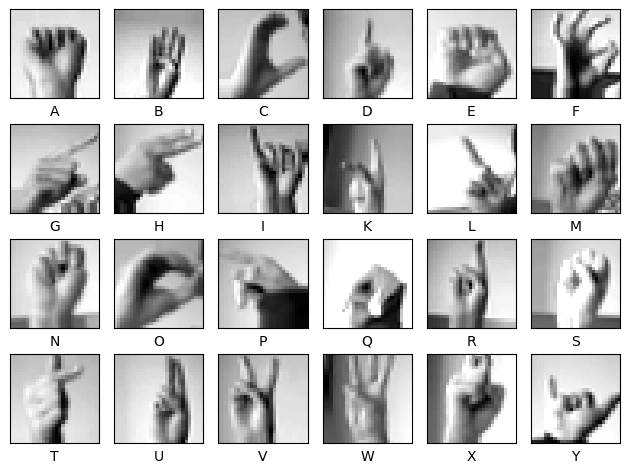

In [15]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train_df.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

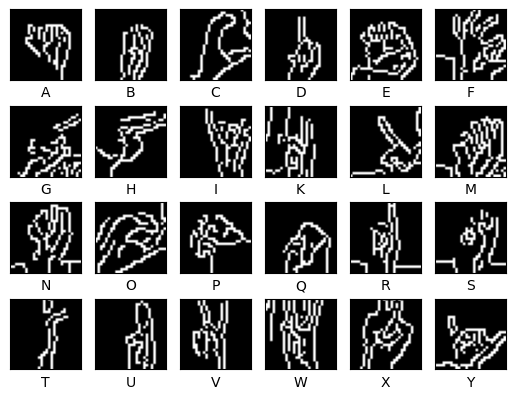

In [16]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(canny_edge_detection(X_train_df.iloc[idx,:].values.reshape(res),.25),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

In [17]:
#largest averages
descr_stats_edges.loc['mean'].sort_values(ascending=False)[0:10]

323    84.557276
351    84.450464
380    83.426471
324    83.136223
379    82.989938
352    82.890093
406    82.284056
408    82.258514
296    82.242260
295    82.005418
Name: mean, dtype: float64

In [19]:
#smallest averages
descr_stats_edges.loc['mean'].sort_values(ascending=True)[0:10]

0      1.316563
28     1.746130
56     1.948142
84     2.073529
112    2.254644
140    2.470588
27     2.765480
168    2.890867
196    3.267028
224    3.380805
Name: mean, dtype: float64

Pixels 323, 351, 324, 380, and 379 are the pixels that are most likely to contain an edge in the images. As a result, these pixels will likely be highly important input features in the classification of the sign language. In contrast, pixels 0, 28, 112, 56, and 84 are the pixels that are least likely to have an edge; therefore, they are likely to not be as important for the classification problem. 